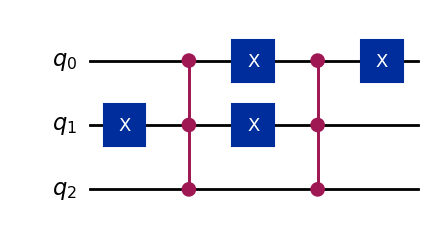

In [7]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

marked_states = ["101", "110"]

oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

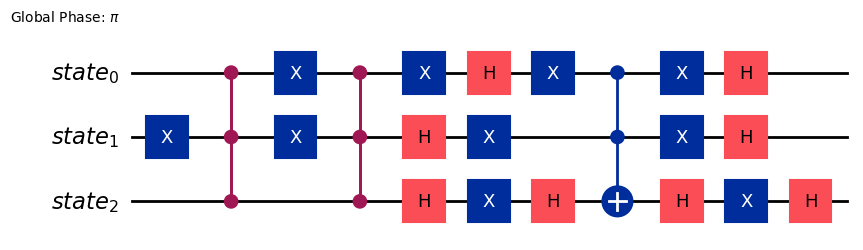

In [5]:
grover_op = GroverOperator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.circuit.library import MCXGate

simulator = Aer.get_backend('qasm_simulator')

circuit = QuantumCircuit(4, 3)

circuit.h(0)
circuit.h(1)
circuit.h(2)

circuit.x(3)

circuit.h(3)

circuit.x(0)
circuit.append(MCXGate(3), [0, 1, 2, 3])
circuit.x(0)
circuit.append(MCXGate(3), [0, 1, 2, 3])

circuit.h(0)
circuit.h(1)
circuit.h(2)

circuit.x(0)
circuit.x(1)
circuit.append(MCXGate(3), [0, 1, 2, 3])
circuit.x(0)
circuit.x(1)

circuit.x(0)
circuit.x(2)
circuit.append(MCXGate(3), [0, 1, 2, 3])
circuit.x(0)
circuit.x(2)

circuit.x(0)
circuit.append(MCXGate(3), [0, 1, 2, 3])
circuit.x(0)

circuit.x(1)
circuit.x(2)
circuit.append(MCXGate(3), [0, 1, 2, 3])
circuit.x(1)
circuit.x(2)

circuit.x(1)
circuit.append(MCXGate(3), [0, 1, 2, 3])
circuit.x(1)

circuit.x(2)
circuit.append(MCXGate(3), [0, 1, 2, 3])
circuit.x(2)

circuit.append(MCXGate(3), [0, 1, 2, 3])

circuit.h(0)
circuit.h(1)
circuit.h(2)

circuit.measure(0, 2)
circuit.measure(1, 1)
circuit.measure(2, 0)

compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
print(circuit)

plot_histogram(counts)
plt.show()

{'111': 506, '011': 494}
     ┌───┐┌───┐     ┌───┐     ┌───┐┌───┐     ┌───┐┌───┐     ┌───┐┌───┐     »
q_0: ┤ H ├┤ X ├──■──┤ X ├──■──┤ H ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──»
     ├───┤└───┘  │  └───┘  │  ├───┤├───┤  │  ├───┤└───┘  │  └───┘└───┘  │  »
q_1: ┤ H ├───────■─────────■──┤ H ├┤ X ├──■──┤ X ├───────■──────────────■──»
     ├───┤       │         │  ├───┤└───┘  │  ├───┤       │  ┌───┐       │  »
q_2: ┤ H ├───────■─────────■──┤ H ├───────■──┤ X ├───────■──┤ X ├───────■──»
     ├───┤┌───┐┌─┴─┐     ┌─┴─┐└───┘     ┌─┴─┐└───┘     ┌─┴─┐└───┘     ┌─┴─┐»
q_3: ┤ X ├┤ H ├┤ X ├─────┤ X ├──────────┤ X ├──────────┤ X ├──────────┤ X ├»
     └───┘└───┘└───┘     └───┘          └───┘          └───┘          └───┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«     ┌───┐                                        ┌───┐┌─┐      
«q_0: ┤ X ├──■──────────────■─────────■─────────■──┤ H ├┤M├───